# EDA

Just some EDA on the test data set merged with the 100_public_ref

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from ipywidgets import widgets, interactive, interact, fixed, interact_manual

In [31]:
train = pd.read_csv('train.csv', parse_dates=['date'], index_col="ID")
train.head()

,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
ID,,,,,,,,,,,,,,,,,,,,,
0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,...,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,...,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,163.699542,...,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,172.996043,...,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,178.396749,...,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975


In [32]:
#merge test.csv with 100_Public_Ref.csv which is the target (burn area) for the test.csv
#merge on ID and use ID as index
test = pd.read_csv('test.csv', parse_dates=['date'], index_col='ID')
test.head()

,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
ID,,,,,,,,,,,,,,,,,,,,,
0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,1.000000,...,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,1.000000,...,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129
2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,1.000000,...,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398
3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,1.000000,...,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158
4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,0.998555,...,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153


In [33]:
test_target = pd.read_csv('100_Public_Ref.csv', index_col='ID')
test_target.head()

,burn_area
ID,
0_2014-01-01,0.122264
1_2014-01-01,0.177169
2_2014-01-01,0.269262
3_2014-01-01,0.302214
4_2014-01-01,0.235954


In [34]:
test = test.merge(right=test_target, how='left', on='ID')
test.head()

,area,date,lat,lon,burn_area_x,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,...,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,burn_area_y
ID,,,,,,,,,,,,,,,,,,,,,
0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,1.000000,...,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457,0.122264
1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,1.000000,...,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129,0.177169
2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,1.000000,...,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398,0.269262
3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,1.000000,...,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158,0.302214
4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,0.998555,...,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153,0.235954


In [35]:
#drop original burn_area_x with all zeroes
test = test.drop(columns='burn_area_x')

In [36]:
test = test.rename(columns={'burn_area_y':'burn_area'})
test.head()

,area,date,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,burn_area
ID,,,,,,,,,,,,,,,,,,,,,
0_2014-01-01,0,2014-01-01,25.447,5.296,142.756021,1217.926180,-953.401012,1360.571291,1.000000,0.0,...,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457,0.122264
1_2014-01-01,1,2014-01-01,25.669,5.293,154.836847,1193.866315,-961.703043,1348.688788,1.000000,0.0,...,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129,0.177169
2_2014-01-01,2,2014-01-01,25.443,5.074,127.790933,1223.640222,-962.435857,1351.521823,1.000000,0.0,...,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398,0.269262
3_2014-01-01,3,2014-01-01,25.665,5.070,136.924571,1201.258784,-961.326298,1338.120278,1.000000,0.0,...,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158,0.302214
4_2014-01-01,4,2014-01-01,25.886,5.067,144.278146,1197.831547,-959.248284,1342.118844,0.998555,0.0,...,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153,0.235954


In [37]:
test.to_csv("merged_test.csv")

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137556 entries, 0_2014-01-01 to 3820_2016-12-01
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   area                137556 non-null  int64         
 1   date                137556 non-null  datetime64[ns]
 2   lat                 137556 non-null  float64       
 3   lon                 137556 non-null  float64       
 4   climate_aet         137556 non-null  float64       
 5   climate_def         137556 non-null  float64       
 6   climate_pdsi        137556 non-null  float64       
 7   climate_pet         137556 non-null  float64       
 8   climate_pr          137556 non-null  float64       
 9   climate_ro          137556 non-null  float64       
 10  climate_soil        137556 non-null  float64       
 11  climate_srad        137556 non-null  float64       
 12  climate_swe         137556 non-null  float64       
 13  climate_tmmn  

In [39]:
test.tail(5)

,area,date,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,burn_area
ID,,,,,,,,,,,,,,,,,,,,,
3816_2016-12-01,3816,2016-12-01,29.075,-13.214,1106.666078,0.0,701.364429,1106.666078,413.977385,169.228033,...,0.003381,0.0,0.994776,0.0,0.001843,0.0,0.0,14.813819,0.302496,0.0
3817_2016-12-01,3817,2016-12-01,29.298,-13.202,1110.827869,0.0,712.703513,1110.827869,408.976932,150.189461,...,0.001844,0.0,0.998156,0.0,0.000000,0.0,0.0,14.815366,0.315196,0.0
3818_2016-12-01,3818,2016-12-01,29.522,-13.189,1104.297877,0.0,728.047262,1104.297877,410.514014,154.363551,...,0.007992,0.0,0.992008,0.0,0.000000,0.0,0.0,15.981201,0.312253,0.0
3819_2016-12-01,3819,2016-12-01,29.745,-13.176,1103.605791,0.0,730.454929,1103.605791,409.563474,149.969406,...,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,15.206220,0.316645,0.0
3820_2016-12-01,3820,2016-12-01,29.758,-13.394,1115.367057,0.0,741.525973,1115.367057,407.668205,156.901668,...,0.000000,0.0,0.998742,0.0,0.001258,0.0,0.0,15.574830,0.329992,0.0


In [40]:
test.shape

(137556, 31)

## EDA

Exploring correlations

<AxesSubplot:>

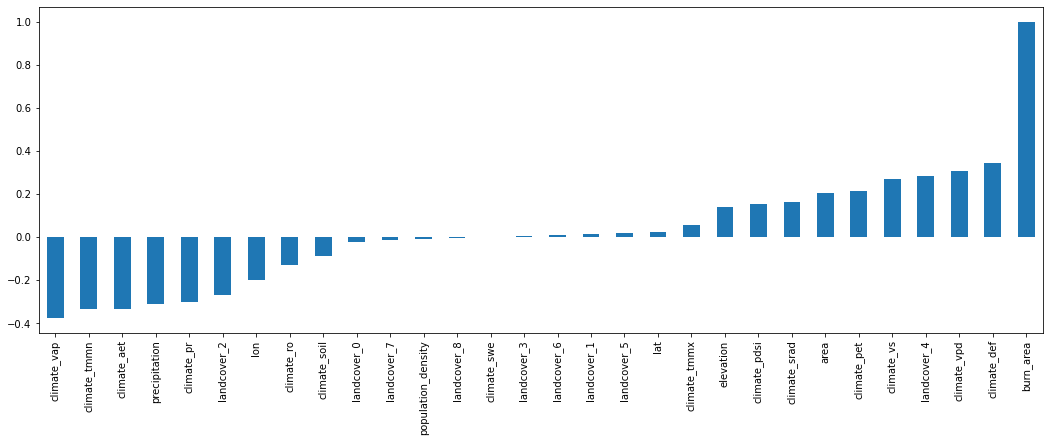

In [41]:
test.corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))

Text(0.5, 1.0, 'Burn Area vs Vapor Pressure')

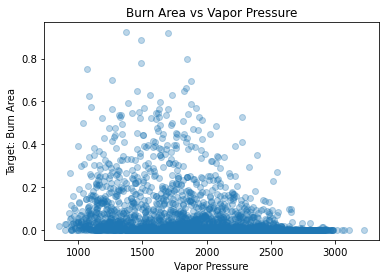

In [42]:
# Look at a few scatter plots (only plotting for a subset of data to keep things fast for now)
sample = test.sample(10000)
plt.scatter(x=sample['climate_vap'], y=sample['burn_area'], alpha=0.3)
plt.xlabel("Vapor Pressure")
plt.ylabel("Target: Burn Area")
plt.title("Burn Area vs Vapor Pressure")

Text(0.5, 1.0, 'Burn Area vs Maximum Temperature')

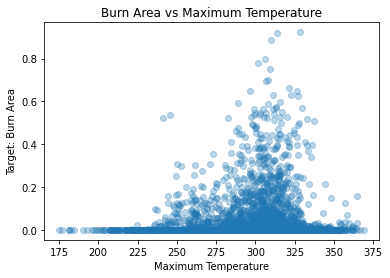

In [43]:
# Higher temp -> more fires it looks like
plt.scatter(sample['climate_tmmx'], sample['burn_area'], alpha=0.3)
plt.xlabel("Maximum Temperature")
plt.ylabel("Target: Burn Area")
plt.title("Burn Area vs Maximum Temperature")

In [44]:
#renaming columns to be more understandable
test = test.rename(columns={'climate_aet':'absolute_evapotranspiration','climate_def':'water_deficit','climate_pdsi':'palmer_drought_severity_index',
                           'climate_pet':'reference_evapotranspiration','climate_pr':'precipitation_accumulation','climate_ro':'runoff',
                           'climate_soil':'soil_moisture','climate_srad':'srad','climate_swe':'snow_water_equiv','climate_tmmn':'min_temp',
                           'climate_tmmx':'max_temp','climate_vap':'vapor_pressure','climate_vpd':'vapor_press_deficit','climate_vs':'wind_speed',
                           'landcover_0':'water_bodies','landcover_1':'evergreen_needleaf','landcover_2':'evergreen_broadleaf',
                            'landcover_3':'deciduous_needleaf','landcover_4':'deciduous_broadleaf','landcover_5':'broadleaf_crops',
                            'landcover_6':'cereal_croplands','landcover_7':'nonvegetated','landcover_8':'urban_built'})
test.columns

Index(['area', 'date', 'lat', 'lon', 'absolute_evapotranspiration',
       'water_deficit', 'palmer_drought_severity_index',
       'reference_evapotranspiration', 'precipitation_accumulation', 'runoff',
       'soil_moisture', 'srad', 'snow_water_equiv', 'min_temp', 'max_temp',
       'vapor_pressure', 'vapor_press_deficit', 'wind_speed', 'elevation',
       'water_bodies', 'evergreen_needleaf', 'evergreen_broadleaf',
       'deciduous_needleaf', 'deciduous_broadleaf', 'broadleaf_crops',
       'cereal_croplands', 'nonvegetated', 'urban_built', 'population_density',
       'precipitation', 'burn_area'],
      dtype='object')

In [45]:
test.to_csv("merged_test.csv")

<AxesSubplot:>

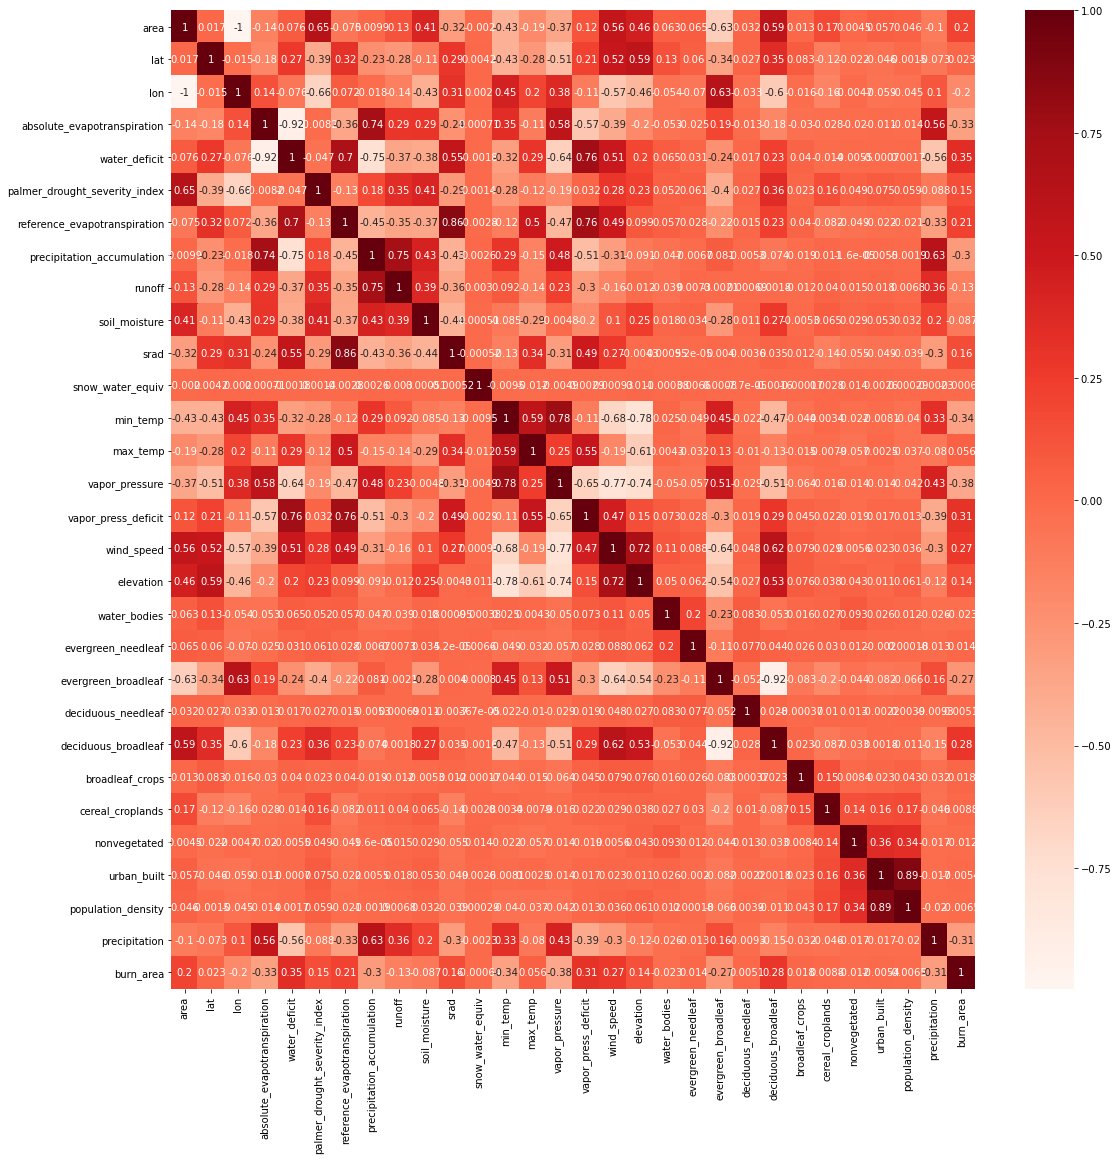

In [46]:
cor = test.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [47]:
cor_target = abs(cor["burn_area"])
relevant_features = cor_target[cor_target>0.25]
relevant_features

absolute_evapotranspiration    0.332564
water_deficit                  0.345001
precipitation_accumulation     0.301399
min_temp                       0.335990
vapor_pressure                 0.376581
vapor_press_deficit            0.306735
wind_speed                     0.269459
evergreen_broadleaf            0.269307
deciduous_broadleaf            0.284934
precipitation                  0.311576
burn_area                      1.000000
Name: burn_area, dtype: float64

In [48]:
all_cors = abs(cor["burn_area"])
all_cors.sort_values().tail(11)

evergreen_broadleaf            0.269307
wind_speed                     0.269459
deciduous_broadleaf            0.284934
precipitation_accumulation     0.301399
vapor_press_deficit            0.306735
precipitation                  0.311576
absolute_evapotranspiration    0.332564
min_temp                       0.335990
water_deficit                  0.345001
vapor_pressure                 0.376581
burn_area                      1.000000
Name: burn_area, dtype: float64

## Aside: correlation of land type with burn area

In [49]:
land_types = ["evergreen_needleaf",'evergreen_broadleaf','deciduous_needleaf','deciduous_broadleaf',
              'broadleaf_crops','cereal_croplands','nonvegetated','urban_built']

In [50]:
print('Land type correlation with population density:')
for i in land_types:
    print(f'{i} :', test['population_density'].corr(test[i]))

Land type correlation with population density:
evergreen_needleaf : 0.0001764502915277218
evergreen_broadleaf : -0.06575220768868345
deciduous_needleaf : 0.0038877397962679954
deciduous_broadleaf : -0.010605485706519289
broadleaf_crops : 0.04264136379355623
cereal_croplands : 0.17300760040148674
nonvegetated : 0.33906325921765545
urban_built : 0.8899817854604083


In [51]:
print('Land type correlation with burn area:')
for i in land_types:
    print(f'{i} :', test['burn_area'].corr(test[i]))

Land type correlation with burn area:
evergreen_needleaf : 0.013635241269387376
evergreen_broadleaf : -0.26930725242520004
deciduous_needleaf : 0.005086563148875256
deciduous_broadleaf : 0.2849336006210341
broadleaf_crops : 0.01761135462076659
cereal_croplands : 0.008800934226760294
nonvegetated : -0.01210647139257136
urban_built : -0.005365907942476422


In [52]:
land_cor = pd.DataFrame(columns=['Land Type','Cor w/ Population Density','Cor w/ Burn Area'])
for i in land_types:
    land_cor = land_cor.append({'Land Type':i, 'Cor w/ Population Density':test['population_density'].corr(test[i]),
                               'Cor w/ Burn Area':test['burn_area'].corr(test[i])}, ignore_index=True)
land_cor

,Land Type,Cor w/ Population Density,Cor w/ Burn Area
0,evergreen_needleaf,0.000176,0.013635
1,evergreen_broadleaf,-0.065752,-0.269307
2,deciduous_needleaf,0.003888,0.005087
3,deciduous_broadleaf,-0.010605,0.284934
4,broadleaf_crops,0.042641,0.017611
5,cereal_croplands,0.173008,0.008801
6,nonvegetated,0.339063,-0.012106
7,urban_built,0.889982,-0.005366


### adding date features

Text(0.5, 1.0, 'Burn Area by Month')

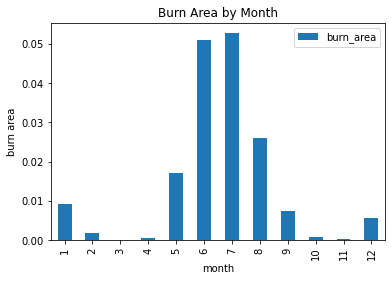

In [53]:
# Date variables
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')
plt.ylabel("burn area")
plt.title("Burn Area by Month")

Text(0, 0.5, 'burn area')

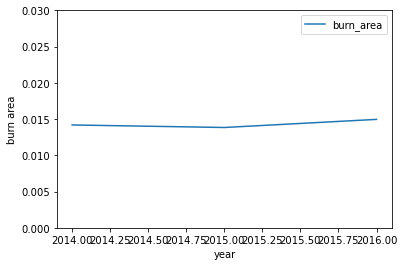

In [54]:
# Plot trend year-on-year
test.groupby('year').mean().reset_index().plot(y='burn_area', x='year', ylim=(0, 0.03))
plt.ylabel("burn area")

<AxesSubplot:xlabel='date'>

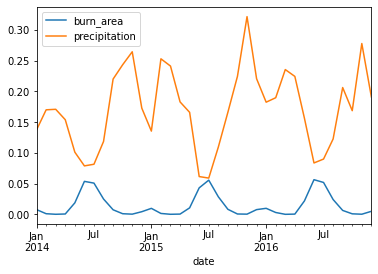

In [55]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = test.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
test.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

<AxesSubplot:xlabel='date'>

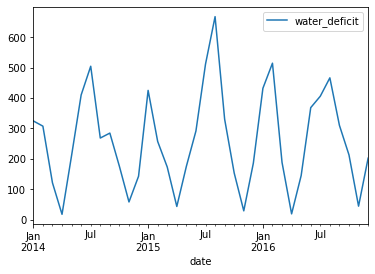

In [56]:
test.groupby('date').mean().reset_index().plot(y='water_deficit', x='date')

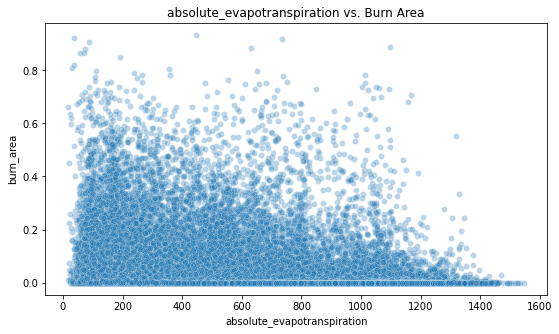

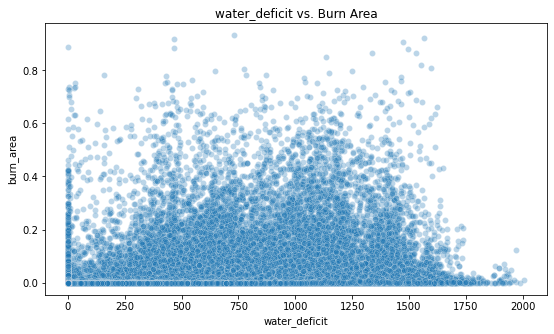

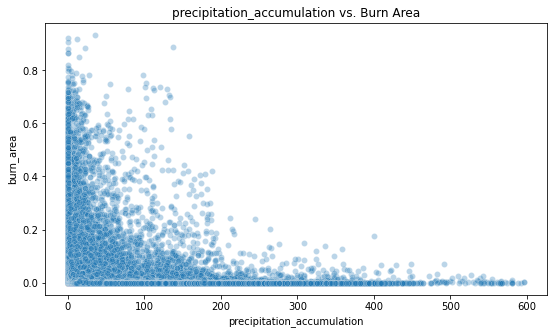

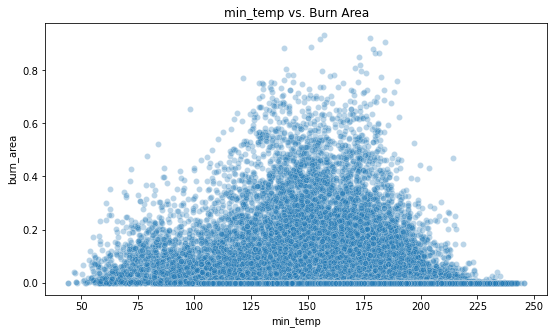

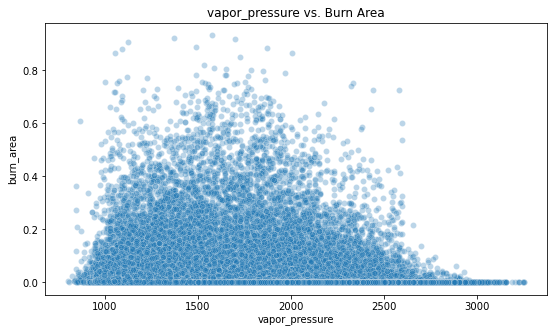

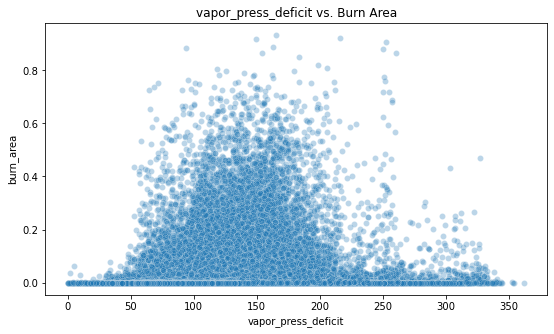

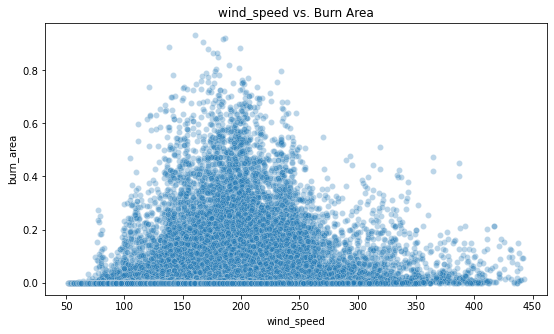

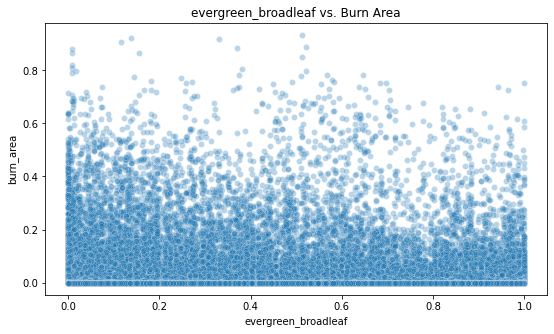

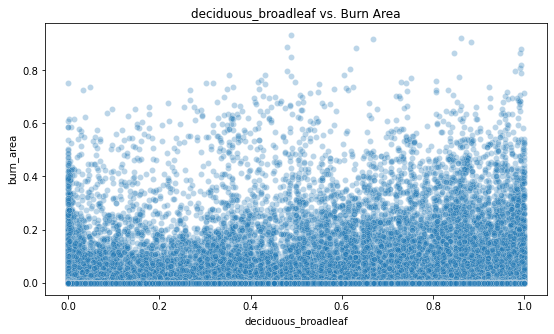

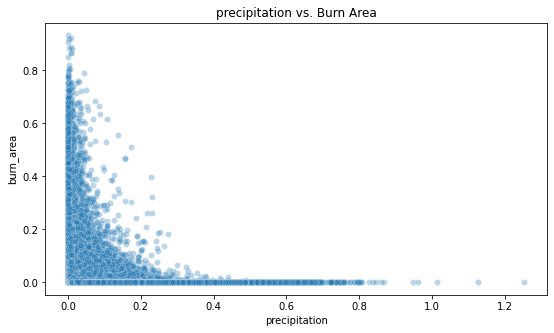

In [57]:
#loop to generate all of the scatterplots
relevantfeatures = ['absolute_evapotranspiration','water_deficit','precipitation_accumulation',
                    'min_temp','vapor_pressure','vapor_press_deficit','wind_speed',
                    'evergreen_broadleaf','deciduous_broadleaf','precipitation']

for i in relevantfeatures:
    fig, ax = plt.subplots(1,1, figsize=(9, 5))
    sns.scatterplot(y=test.burn_area, x=test[i], alpha=0.3)
    plt.title(f'{i} vs. Burn Area')
    